# Úkol č. 2 - regrese

* Termíny jsou uvedeny na [courses.fit.cvut.cz](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s regresní úlohou, s příznaky různých typů a s chybějícími hodnotami.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí délky dožití v různých zemích a letech.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:

* Year - Rok
* Status - Status rozvinuté nebo rozvojové země
* Life expectancy - Délka dožití v letech - **cílová proměnná, kterou budete predikovat**
* Adult Mortality - Úmrtnost dospělých bez ohledu na pohlaví (pravděpodobnost, že osoby, které dosáhly věku 15 let, zemřou před dosažením věku 60 let (uvedeno na 1 000 osob)).
* infant deaths - počet zemřelých kojenců na 1000 obyvatel
* Alcohol - Alkohol, zaznamenaná spotřeba na obyvatele (15+) (v litrech čistého alkoholu)
* percentage expenditure - Výdaje na zdravotnictví v procentech hrubého domácího produktu na obyvatele (%)
* Hepatitis B - pokrytí očkováním proti hepatitidě B (HepB) u dětí ve věku 1 roku (%)
* Measles - Spalničky - počet hlášených případů na 1000 obyvatel
* BMI - průměrný index tělesné hmotnosti celé populace
* under-five deaths - počet úmrtí dětí do pěti let na 1000 obyvatel
* Polio - proočkovanost proti dětské obrně (Pol3) u dětí ve věku 1 roku (%)
* Total expenditure - Výdaje vládních institucí na zdravotnictví jako procento celkových vládních výdajů (%)
* Diphtheria - pokrytí očkováním proti záškrtu, tetanu a černému kašli (DTP3) u jednoletých dětí (%)
* HIV/AIDS - počet úmrtí na 1 000 živě narozených dětí na HIV/AIDS (0-4 roky)
* GDP - hrubý domácí produkt na obyvatele (v USD)
* Population - počet obyvatel země
* thinness 1-19 years - podíl dětí ve věku 10-19 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* thinness 5-9 years - podíl dětí ve věku 5-9 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* Income composition of resources - Index lidského rozvoje z hlediska příjmového složení zdrojů (index v rozmezí 0 až 1)
* Schooling - počet let školní docházky (roky)


## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném regresním modelu.
    * Nějakým způsobem se vypořádejte s chybějícími hodnotami. _Pozor na metodické chyby!_
    * Můžete využívat i vizualizace. Vše stručně ale náležitě komentujte.
<br /><br />
  * Vytvořte **vlastní implementaci náhodného lesa**. Použijte k tomu níže předpřipravenou kostru.
  
  * Na připravená data postupně aplikujte Vaši předchozí implementaci modelu náhodného lesa, dále jeden z modelů **lineární regrese** nebo **hřebenové regrese**, a alespoň jeden další model podle Vašeho uvážení, přičemž pro každý z těchto modelů přiměřeně:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Experimentujte s normalizací (standardizace/min-max), pokud pro daný model očekáváte její příznivý vliv.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty (vzhledem k RMSE).
    * Pro model s nejlepšími hodnotami hyperparametrů určete jeho chybu pomocí RMSE a MAE. _Pozor na metodické chyby!_
    * Získané výsledky vždy řádně okomentujte.
<br /><br />
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model a odhadněte, jakou chybu (RMSE) můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tato data. Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte s využitím tří sloupců: **Country**, **Year** a **Life expectancy**. Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

  * Ukázka prvních řádků souboru `results.csv`:
  
```
Country,Year,Life expectancy
Peru,2012,71.4
Peru,2013,72.6
...
```


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.

#  Řešení

## Načtení dat

> ##### Naimportuju potřebné baličky

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from scipy import optimize

> ##### Načteme datasety

In [2]:
df = pd.read_csv("data.csv")
df_eval = pd.read_csv("evaluation.csv")

> ##### Podíváme se jak dataset vypadá

In [3]:
display(df.head())
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2713,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2714,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2715,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2716,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2717,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


> ##### Podíváme se na informace o datasetu

In [4]:
df.shape

(2718, 22)

In [5]:
df.nunique()

Country                             183
Year                                 16
Status                                2
Life expectancy                     359
Adult Mortality                     423
infant deaths                       195
Alcohol                            1055
percentage expenditure             2185
Hepatitis B                          87
Measles                             909
BMI                                 600
under-five deaths                   239
Polio                                73
Total expenditure                   792
Diphtheria                           81
HIV/AIDS                            197
GDP                                2317
Population                         2110
thinness  1-19 years                194
thinness 5-9 years                  200
Income composition of resources     613
Schooling                           173
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2718 non-null   object 
 1   Year                             2718 non-null   int64  
 2   Status                           2718 non-null   object 
 3   Life expectancy                  2718 non-null   float64
 4   Adult Mortality                  2718 non-null   float64
 5   infant deaths                    2718 non-null   int64  
 6   Alcohol                          2564 non-null   float64
 7   percentage expenditure           2718 non-null   float64
 8   Hepatitis B                      2188 non-null   float64
 9   Measles                          2718 non-null   int64  
 10  BMI                              2692 non-null   float64
 11  under-five deaths                2718 non-null   int64  
 12  Polio               

In [7]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2718.000000,2718.000000,2718.000000,2718.000000,2564.000000,2718.000000,2188.000000,2718.000000,2692.000000,2718.000000,2700.000000,2529.000000,2700.000000,2718.000000,2317.000000,2.116000e+03,2692.000000,2692.000000,2576.000000,2576.000000
mean,2007.113687,69.204525,164.432303,30.825239,4.672512,757.071658,80.884826,2370.999632,38.314339,42.767476,82.528148,5.943606,82.135926,1.788263,7646.459541,1.261063e+07,4.892236,4.925149,0.626697,11.996079
std,4.537979,9.612530,125.512789,121.786599,4.051664,2007.472092,25.010075,11174.241799,19.954800,165.704415,23.294376,2.488801,23.849574,5.221587,14455.594394,6.238395e+07,4.434584,4.522269,0.213323,3.364109
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.100000,73.250000,0.000000,0.990000,5.832385,77.000000,0.000000,19.200000,0.000000,77.000000,4.260000,78.000000,0.100000,459.291200,1.829220e+05,1.600000,1.600000,0.492000,10.100000
50%,2007.000000,72.200000,142.000000,3.000000,3.820000,67.687008,92.000000,18.000000,43.450000,4.000000,93.000000,5.730000,93.000000,0.100000,1741.142552,1.365022e+06,3.400000,3.400000,0.679000,12.300000
75%,2011.000000,75.800000,227.000000,22.000000,7.832500,446.887709,97.000000,372.000000,56.100000,28.000000,97.000000,7.530000,97.000000,0.800000,6337.882993,7.383590e+06,7.200000,7.300000,0.781000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.938000,20.700000


## Zpracování dat

> ##### V datasetu je chyba v názvu příznaku ***thinness 1-19 years***, podle popisu by se měl jmenovat ***thinness 10-19 years***. Opravím tedy jeho název

In [8]:
df.rename(columns={'thinness  1-19 years': 'thinness 10-19 years'}, inplace=True)
df_eval.rename(columns={'thinness  1-19 years': 'thinness 10-19 years'}, inplace=True)

In [9]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


> ##### Podívejme se na příznak Status

In [10]:
# unique country-status couples
country_status = df[['Country', 'Status']].drop_duplicates()
num_countries = country_status['Country'].nunique()

country_status.head(num_countries)

,Country,Status
0,Afghanistan,Developing
16,Albania,Developing
32,Algeria,Developing
48,Angola,Developing
64,Antigua and Barbuda,Developing
...,...,...
2638,Venezuela (Bolivarian Republic of),Developing
2654,Viet Nam,Developing
2670,Yemen,Developing
2686,Zambia,Developing


👆 Při pohledu na tyto údaje jsem zjistil, že země jako Kanada, Finsko, Francie, Řecko, Izrael a Korejská republika mají nespravný status, jsou uvedeny jako *Developing* země, ačkoli by měly být *Develop* zeměmi. Takže to opravím.

In [11]:
# Seznam zemí, které je třeba opravit
countries_to_update = [
    "Greece", "Israel", "Finland", "France", "Republic of Korea", "Canada"]

for country in countries_to_update:
    df.loc[df['Country'] == country, 'Status'] = 'Developed'
    df_eval.loc[df['Country'] == country, 'Status'] = 'Developed'

> ##### Příznak ***Status*** převedu na kategoriální datový typ a reprezentuju ho číselně.

In [12]:
# Převod na kategorický typ
df['Status'] = df['Status'].astype('category')
df_eval['Status'] = df_eval['Status'].astype('category')

# Převod kategorií na číselné hodnoty
df['Status'] = df['Status'].cat.codes
df_eval['Status'] = df_eval['Status'].cat.codes

> ##### Zkontrolujme, zda máme hodnoty přesahující hranice uvedené v popisu, a nahraďme je pomocí `np.nan`

In [13]:
# Seznam sloupců s maximální povolenou hodnotou
max_values = {
    'Adult Mortality': 1000, 
    'infant deaths': 1000, 
    'percentage expenditure': 100,
    'Hepatitis B': 100,
    'Measles': 1000,
    'under-five deaths': 1000,
    'Polio': 100,
    'Total expenditure': 100,
    'Diphtheria': 100,
    'HIV/AIDS': 1000,
    'thinness 10-19 years': 100,
    'thinness 5-9 years': 100,
    'Income composition of resources': 1
}

# Kontrola a nahrazení neplatných hodnot pro oba dataframe: df a df_eval
for column, max_value in max_values.items():
        # Zjištění neplatných hodnot
        invalid_values = (df[column] > max_value) | (df[column] < 0)
        invalid_values_count = df[invalid_values].shape[0]

        # Výpis počtu neplatných hodnot a jejich nahrazení
        if invalid_values_count > 0:
            print(f'{column}: {invalid_values_count} neplatných hodnot v df')
            df.loc[invalid_values, column] = np.nan

for column, max_value in max_values.items():
        # Zjištění neplatných hodnot
        invalid_values = (df_eval[column] > max_value) | (df_eval[column] < 0)
        invalid_values_count = df_eval[invalid_values].shape[0]

        # Výpis počtu neplatných hodnot a jejich nahrazení
        if invalid_values_count > 0:
            print(f'{column}: {invalid_values_count} neplatných hodnot v df_eval')
            df_eval.loc[invalid_values, column] = np.nan    

infant deaths: 13 neplatných hodnot v df
percentage expenditure: 1220 neplatných hodnot v df
Measles: 490 neplatných hodnot v df
under-five deaths: 16 neplatných hodnot v df
percentage expenditure: 81 neplatných hodnot v df_eval
Measles: 35 neplatných hodnot v df_eval


> ##### Při zkoumání datasetu jsem si všiml, že příznak ***Population*** se v jednotlivých letech liší v řádu desítek/stovek, což nevypadá normalně. Výpočtem korelace ověřím, jak cílová proměnná závisí na příznaku ***Population***

In [14]:
correlation = df['Population'].corr(df['Life expectancy'])
print(f'Korelace mezi Population a Life expectancy: {correlation:.3f}')

Korelace mezi Population a Life expectancy: -0.021


> ##### 👆 Jak je vidět z výpočtu, korelace je poměrně malá, takže si myslím, že je lepší odstranit příznak "populace" kvůli jeho nenormálnímu chování.

In [15]:
df = df.drop('Population', axis=1)
df_eval = df_eval.drop('Population', axis=1)

## Rozdělení dat

In [16]:
Xdata = df.drop("Life expectancy", axis = 1)
ydata = df["Life expectancy"]

In [17]:
random_seed = 111
# train = 60% val = 20% test = 20%
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.4, random_state=random_seed) 
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state=random_seed) 

In [18]:
display(df.shape)
display(Xtrain.shape)
display(Xtest.shape)
display(Xval.shape)

(2718, 21)

(1630, 20)

(544, 20)

(544, 20)

### Zpracování `NULL` hodnot

> ##### K vyplnění prázdných hodnot použiji medián, protože si myslím, že v našem případě bude fungovat lépe než střední hodnota. Vypočítám tedy medián na trénovacích datech a vyplním jím prázdné hodnoty ve všech datových množinách, abych zabránil úniku trénovacích dat do testovacích dat. Zároveň, pokud existuje medián pro danou zemi, použiji jej, pokud jej nelze vypočítat, použiji medián pro všechny země.

In [19]:
# Vyhledávání sloupců s chybějícími hodnotami v Xtrain
missing_cols = Xtrain.columns[Xtrain.isnull().any()]

# Výpočet mediánu pro každý z těchto sloupců v Xtrain
global_median = Xtrain[missing_cols].median()

# Výpočet mediánu pro každou zemi v každém sloupci
country_medians = Xtrain.groupby('Country')[missing_cols].median()

# Doplnění chybějících hodnot
for col in missing_cols:
    # Doplnění hodnot pro Xtrain
    for country in Xtrain['Country'].unique():
        country_median = country_medians.loc[country, col]
        if np.isnan(country_median):
            country_median = global_median[col]
        Xtrain.loc[(Xtrain['Country'] == country) & (Xtrain[col].isnull()), col] = country_median

    for country in Xval['Country'].unique():
        if country in country_medians.index:
            country_median = country_medians.loc[country, col]
            if np.isnan(country_median):
                country_median = global_median[col]
            Xval.loc[(Xval['Country'] == country) & (Xval[col].isnull()), col] = country_median
        else:
            Xval.loc[Xval[col].isnull(), col] = global_median[col]

    for country in Xtest['Country'].unique():
        if country in country_medians.index:
            country_median = country_medians.loc[country, col]
            if np.isnan(country_median):
                country_median = global_median[col]
            Xtest.loc[(Xtest['Country'] == country) & (Xtest[col].isnull()), col] = country_median
        else:
            Xtest.loc[Xtest[col].isnull(), col] = global_median[col]

    for country in df_eval['Country'].unique():
        if country in country_medians.index:
            country_median = country_medians.loc[country, col]
            if np.isnan(country_median):
                country_median = global_median[col]
            df_eval.loc[(df_eval['Country'] == country) & (df_eval[col].isnull()), col] = country_median
        else:
            df_eval.loc[df_eval[col].isnull(), col] = global_median[col]
    

> ##### Rozhodl jsem se odstranit příznak ***Country*** protože představuje kategorický příznak s vysokou kardinalitou, což může vést k problémům s přetrénováním modelu, zvláště pokud pro některé země existuje jen málo dat. Kromě toho samotný název země často neposkytuje přímé a relevantní informace pro předpovídání cílové proměnné a může ztížit interpretaci modelu.Odstranění tohoto sloupce tedy zjednodušuje model a pomáhá zaměřit se na kvantitativní a relevantní příznaky pro předpovědi.

In [20]:
Xtrain.drop('Country', axis=1, inplace=True)
Xval.drop('Country', axis=1, inplace=True)
Xtest.drop('Country', axis=1, inplace=True)
countries = df_eval['Country'].copy()
df_eval.drop('Country', axis=1, inplace=True)

## Model *Random Forest*

> ##### ***Přiměřenost pro úlohu:*** Vzhledem ke schopnosti modelovat složité vztahy mezi různými příznaky a cílovou proměnnou je náhodný les vhodný pro předpovídání délky života, které může být ovlivněno mnoha faktory.

In [21]:
class CustomRandomForest:
    def __init__(self, n_estimators, max_samples, max_depth, **kwargs):
        self.n_estimators = n_estimators
        self.max_samples = max_samples # relativní počet bodů (tj. číslo mezi 0 a 1)
        self.max_depth = max_depth
        self.trees = []
        self.kwargs = kwargs

    def fit(self, X, y):
        n_samples = X.shape[0]
        n_sub_samples = round(n_samples * self.max_samples)
        
        for _ in range(self.n_estimators):
            X_sample, y_sample = resample(X, y, n_samples=n_sub_samples)
            tree = DecisionTreeRegressor(max_depth=self.max_depth, **self.kwargs)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.zeros(X.shape[0])
        for tree in self.trees:
            predictions += tree.predict(X)
        return predictions / self.n_estimators


> ##### Vytvořím mřížku hyperparametrů, které budu ladit

In [22]:
param_grid = {  # Používám mřížku s těmito parametry, protože při větším počtu kombinací trvá trénování VELMI dlouho.
    'n_estimators': list(range(10, 201, 25)),
    'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'max_depth': [3, 5, 9, 11, 13, 15],
    'max_features': ['sqrt', 'log2']
}

grid = ParameterGrid(param_grid)

> ##### Natrénuju model a určím nejlepší hyperparametry pomocí RMSE

In [23]:
results = []

for params in grid:
    # Vytvoření a trénování modelu
    model = CustomRandomForest(**params)
    model.fit(Xtrain, ytrain)

    # Predikce a výpočet RMSE pro validační data
    y_pred_val = model.predict(Xval)
    rmse_val = np.sqrt(mean_squared_error(yval, y_pred_val))

    # Predikce a výpočet RMSE pro trénovací data
    y_pred_train = model.predict(Xtrain)
    rmse_train = np.sqrt(mean_squared_error(ytrain, y_pred_train))

    # Uložení výsledků
    results.append((rmse_val, rmse_train, params))

# Seřazení výsledků podle RMSE na validačních datech
results.sort(key=lambda x: x[0])

# Nejlepší parametry a RMSE
best_rmse_val, best_rmse_train, best_params = results[0]
print("Nejlepší parametry:", best_params)
print("RMSE na validačních datech:", best_rmse_val)
print("RMSE na trénovacích datech:", best_rmse_train)

Nejlepší parametry: {'max_depth': 15, 'max_features': 'sqrt', 'max_samples': 0.9, 'n_estimators': 135}
RMSE na validačních datech: 1.9870491409526658
RMSE na trénovacích datech: 0.8523940364976992


> ##### Natrénuju náhodný les s nejlepšími parametry.

In [24]:
best_forest = CustomRandomForest(**best_params)
best_forest.fit(Xtrain, ytrain)

# Predikce a výpočet metrik na validačních datech
y_pred_val = best_forest.predict(Xval)
rmse_val = np.sqrt(mean_squared_error(yval, y_pred_val))
mae_val = mean_absolute_error(yval, y_pred_val)

# Predikce a výpočet metrik na testovacích datech
y_pred_test = best_forest.predict(Xtest)
rmse_test = np.sqrt(mean_squared_error(ytest, y_pred_test))
mae_test = mean_absolute_error(ytest, y_pred_test)

print("RMSE nejlepšího modelu na validačních datech:", rmse_val)
print("MAE nejlepšího modelu na validačních datech:", mae_val)
print("RMSE nejlepšího modelu na testovacích datech:", rmse_test)
print("MAE nejlepšího modelu na testovacích datech:", mae_test)

RMSE nejlepšího modelu na validačních datech: 2.0228976272406993
MAE nejlepšího modelu na validačních datech: 1.322112993915928
RMSE nejlepšího modelu na testovacích datech: 1.9283341138197818
MAE nejlepšího modelu na testovacích datech: 1.2548679549674882


👆 Jak je vidět, RMSE je asi 2 roky, myslím, že je to docela dobrý výsledek.

## Model *Hřebenová regrese*

> ##### ***Přiměřenost pro úlohu:*** Tento model je vhodný, pokud předpokládáme, že vztah mezi příznaky a délkou života je lineární. Je účinný v situacích, kde existuje vysoká korelace mezi příznaky.

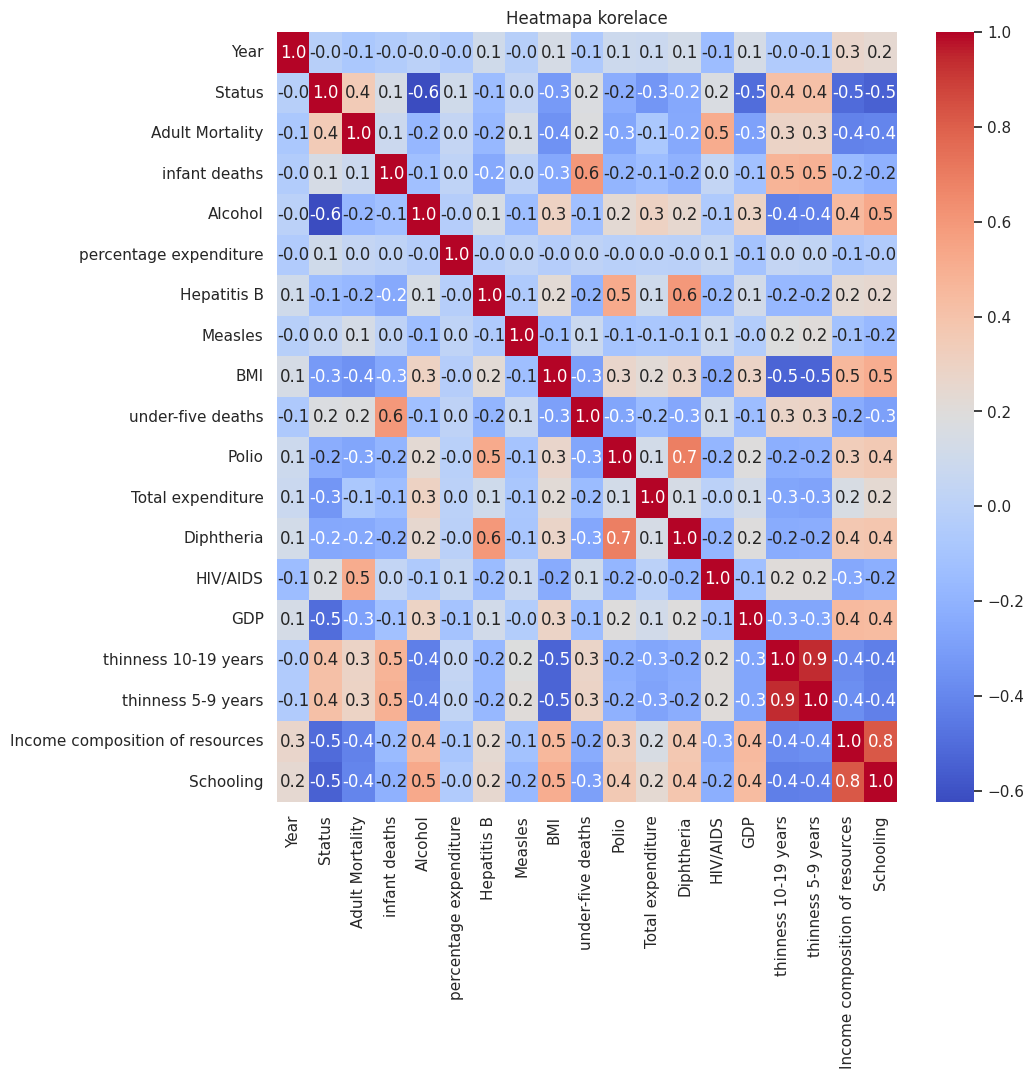

In [25]:
data_for_analysis = Xtrain

# Výpočet korelační matice
corr_matrix = data_for_analysis.corr()

# Vytvoření heatmapy
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm')
plt.title("Heatmapa korelace");

👆 Jak je vidět z této heatmapy, některé příznaky spolu silně korelují, proto jsem jako druhý model zvolil hřebenovou regresi, která řeší problém s multikolinearitou.

> ##### Vytvořím funkci pro vytvoření a optimalizaci modelu hřebenové regrese s použitím StandardScaler

> ##### StandardScaler používám po experimentování s jinými metodami škálování, které nepřinesly velmi odlišné výsledky

In [26]:
def get_opt_ridge_model(Xtrain, ytrain, Xval, yval):
    
    # Standardizace dat
    scaler = StandardScaler()
    Xtrain_scaled = scaler.fit_transform(Xtrain)
    Xval_scaled = scaler.transform(Xval)

    def ridgemodel_eval(alpha):
        clf = Ridge(alpha=alpha)
        clf.fit(Xtrain_scaled, ytrain)
        return mean_squared_error(yval, clf.predict(Xval_scaled), squared=False)

    alphas = np.linspace(1, 500, 150)
    alphas_res = [ridgemodel_eval(alpha) for alpha in alphas]
    plt.plot(alphas, alphas_res, '.')
    plt.show()

    # Automatické nalezení optimálního alpha
    opt_alpha = optimize.minimize_scalar(ridgemodel_eval, options={'maxiter': 30}, method='bounded', bounds=(0.1, 400))
    print('Optimální alpha:', opt_alpha.x)

    clf_opt_ridge = Ridge(alpha=opt_alpha.x)
    clf_opt_ridge.fit(Xtrain_scaled, ytrain)
    return clf_opt_ridge, scaler

> ##### Natrénuju model a spočítám RMSE a MAE.

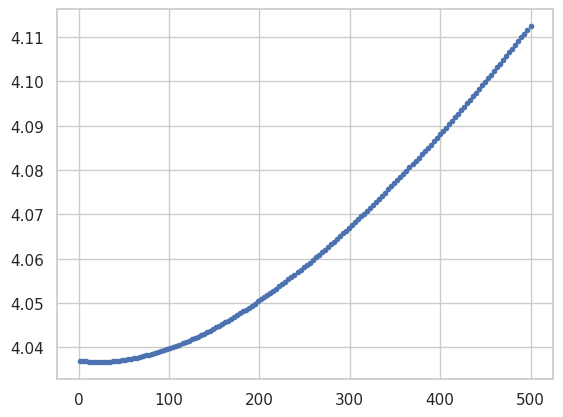

Optimální alpha: 21.31635424398536
Validační RMSE: 4.03672
Validační MAE: 3.05769
Testovací RMSE: 3.92707
Testovací MAE: 2.89971


In [27]:
# Použití funkce pro získání modelu a scaleru
clf_opt_ridge, scaler = get_opt_ridge_model(Xtrain, ytrain, Xval, yval)

# Výpočet RMSE a MAE pro validační data
Xval_scaled = scaler.transform(Xval)
y_pred_val = clf_opt_ridge.predict(Xval_scaled)
RMSE_val_opt_ridge = mean_squared_error(yval, y_pred_val, squared=False)
MAE_val_opt_ridge = mean_absolute_error(yval, y_pred_val)

print(f'Validační RMSE: {RMSE_val_opt_ridge:.5f}')
print(f'Validační MAE: {MAE_val_opt_ridge:.5f}')

# Výpočet RMSE a MAE pro testovací data
Xtest_scaled = scaler.transform(Xtest)
y_pred_test = clf_opt_ridge.predict(Xtest_scaled)
RMSE_test_opt_ridge = mean_squared_error(ytest, y_pred_test, squared=False)
MAE_test_opt_ridge = mean_absolute_error(ytest, y_pred_test)

print(f'Testovací RMSE: {RMSE_test_opt_ridge:.5f}')
print(f'Testovací MAE: {MAE_test_opt_ridge:.5f}')

👆 Jak je vidět, RMSE pro tento model je přibližně 4 roky, což není tak dobrý výsledek.

## Model *AdaBoost*

> ##### ***Přiměřenost pro úlohu:*** AdaBoost může být velmi účinný v případě, že vztah mezi příznaky a délkou života je složitý a není zřejmě lineární.

In [28]:
param_grid = {
    'n_estimators': range(10, 100, 10),
    'max_depth': range(2,7),
    'learning_rate': [0.01, 0.1, 0.5, 0.75, 1]
}

param_comb = ParameterGrid(param_grid)

In [29]:
val_metric = []
for params in param_comb:
    dt_depth = params.pop("max_depth")
    params["estimator"] = DecisionTreeRegressor(max_depth = dt_depth)
    dt = AdaBoostRegressor(**params, random_state = 111).fit(Xtrain, ytrain)
    val_metric.append(mean_squared_error(yval, dt.predict(Xval), squared = False))
    
best_params = param_comb[np.argmin(val_metric)]
print("Nejlepší parametry:", best_params)
print("RMSE na validačních datech:", min(val_metric))

Nejlepší parametry: {'n_estimators': 80, 'max_depth': 6, 'learning_rate': 1}
RMSE na validačních datech: 2.1989944566584723


> ##### Natrénuju model s nejlepšími hyperparametry a spočítám pro něj RMSE a MAE.

In [30]:
# Získání nejlepších parametrů
best_max_depth = best_params["max_depth"]
best_n_estimators = best_params["n_estimators"]
best_learning_rate = best_params["learning_rate"]

# Vytvoření a trénink nejlepšího modelu AdaBoost
best_adaboost = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=best_max_depth),
    n_estimators=best_n_estimators,
    learning_rate=best_learning_rate,
    random_state=111
)
best_adaboost.fit(Xtrain, ytrain)

# Predikce a výpočet metrik na validačních datech
y_pred_val = best_adaboost.predict(Xval)
rmse_val = mean_squared_error(yval, y_pred_val, squared=False)
mae_val = mean_absolute_error(yval, y_pred_val)

print("RMSE na validačních datech:", rmse_val)
print("MAE na validačních datech:", mae_val)

# Predikce a výpočet metrik na testovacích datech
y_pred_test = best_adaboost.predict(Xtest)
rmse_test = mean_squared_error(ytest, y_pred_test, squared=False)
mae_test = mean_absolute_error(ytest, y_pred_test)

print("RMSE na testovacích datech:", rmse_test)
print("MAE na testovacích datech:", mae_test)

RMSE na validačních datech: 2.1989944566584723
MAE na validačních datech: 1.6853123061551454
RMSE na testovacích datech: 2.1702233817324266
MAE na testovacích datech: 1.6688412542964972


👆 Jak je vidět, RMSE je jen o málo vyšší než dvě, což je docela dobrý výsledek.

## Finalní model

Podle výsledků, které jsem získal po natrénování modelů, jsem se rozhodl zvolit **Random forest** jako finální model 

RMSE modelu na neznámých datech lze odhadnout na základě RMSE na testovacích datech, tj. přibližně 2 roky.

## Evaluace

> ##### Udělám predikci pro dataset evaluation a výsledky uložím do souboru results.csv

In [31]:
predicted_life_expectancy = best_forest.predict(df_eval)

results_df = pd.DataFrame({
    'Country': countries,
    'Year': df_eval['Year'],
    'Life expectancy': predicted_life_expectancy
})

results_df.to_csv('results.csv', index=False)

> ##### Podíváme se na výsledky predikce

In [32]:
results_df

,Country,Year,Life expectancy
0,Azerbaijan,2015,74.244670
1,Azerbaijan,2014,73.700985
2,Azerbaijan,2013,73.541363
3,Azerbaijan,2012,73.802220
4,Azerbaijan,2011,73.851798
...,...,...,...
205,United Republic of Tanzania,2014,65.223279
206,United Republic of Tanzania,2013,57.518660
207,United Republic of Tanzania,2012,55.458246
208,United Republic of Tanzania,2011,54.484505


Hezké svátky🎄😄